<a href="https://colab.research.google.com/github/vard-uhi/statistics-with-python-tasks/blob/main/Univariate_Analysis_Using_NHANES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [3]:
#load the data
from google.colab import files
data_to_load = files.upload()

Saving nhanes_2015_2016.csv to nhanes_2015_2016.csv


In [4]:
import io
# .read_csv() assigns the information from the initial *.csv file to this variable
raw_data = pd.read_csv(io.BytesIO(data_to_load['nhanes_2015_2016.csv']))

In [5]:
df = raw_data.copy()

In [6]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three contingency tables using only people whose age is between 30 and 40.

In [7]:
#checking unique values in Marital Status
df['DMDMARTL'].unique()

array([ 1.,  3.,  6.,  4.,  5., nan,  2., 77.])

In [8]:
#shape of the DataFrame
df.shape

(5735, 28)

In [9]:
#total number of null values in Marital Status
pd.isnull(df['DMDMARTL']).sum()

261

In [10]:
#creating new Dataframe with required variables
new_df = df.loc[:, ["DMDMARTL", "RIAGENDR", "RIDAGEYR"]]

In [11]:
#looking at data
new_df.head()

,DMDMARTL,RIAGENDR,RIDAGEYR
0,1.0,1,62
1,3.0,1,53
2,1.0,1,78
3,6.0,2,56
4,3.0,2,42


In [12]:
#checking whether we have other columns with missing values
pd.isnull(new_df).sum()

DMDMARTL    261
RIAGENDR      0
RIDAGEYR      0
dtype: int64

In [13]:
#drop missing values
new_df = new_df.dropna()

In [14]:
#reset index
new_df.reset_index(inplace=True, drop=True)

In [15]:
pd.isnull(new_df).sum()

DMDMARTL    0
RIAGENDR    0
RIDAGEYR    0
dtype: int64

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5474 entries, 0 to 5473
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DMDMARTL  5474 non-null   float64
 1   RIAGENDR  5474 non-null   int64  
 2   RIDAGEYR  5474 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 128.4 KB


In [17]:
#checking unique values in Marital Status
new_df['DMDMARTL'].unique()

array([ 1.,  3.,  6.,  4.,  5.,  2., 77.])

In [18]:
#relabeling them
new_df['Marital_Status'] = new_df['DMDMARTL'].replace({1.0: "Married", 5.0: "Never married", 3.0: "Divorced", 6.0: "Living with partner", 
                                               2.0: "Widowed", 4.0: "Separated", 77.0: "Refused"})

In [19]:
#looking at unique values in gender
new_df['RIAGENDR'].unique()

array([1, 2])

In [20]:
#relabeling gender variable
new_df['Gender'] = new_df['RIAGENDR'].replace({1: "Male", 2: "Female"})

In [21]:
#checking data in Age variable
new_df['RIDAGEYR'].unique()

array([62, 53, 78, 56, 42, 72, 22, 32, 46, 45, 30, 67, 57, 24, 27, 54, 49,
       80, 69, 58, 60, 51, 68, 66, 37, 29, 20, 70, 23, 61, 39, 50, 44, 71,
       31, 41, 35, 21, 40, 48, 63, 79, 38, 74, 26, 55, 52, 47, 43, 75, 33,
       28, 65, 25, 73, 36, 64, 59, 77, 76, 34])

In [22]:
#renaming it
new_df['Age'] = new_df['RIDAGEYR']

In [23]:
#Marital Status Frequency Table for All People
new_df['Marital_Status'].value_counts()

Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Separated               186
Refused                   2
Name: Marital_Status, dtype: int64

In [24]:
#Frequency Table for Women and Man by Martial Status
new_df.groupby(["Gender", "Marital_Status"]).size()

Gender  Marital_Status     
Female  Divorced                350
        Living with partner     262
        Married                1303
        Never married           520
        Refused                   1
        Separated               118
        Widowed                 296
Male    Divorced                229
        Living with partner     265
        Married                1477
        Never married           484
        Refused                   1
        Separated                68
        Widowed                 100
dtype: int64

same thing this time with separate tables

In [25]:
#Marital Status Frequency Table for women only
new_df[new_df['Gender'] == 'Female'].groupby('Marital_Status')['Gender'].count()

Marital_Status
Divorced                350
Living with partner     262
Married                1303
Never married           520
Refused                   1
Separated               118
Widowed                 296
Name: Gender, dtype: int64

In [26]:
##Marital Status Frequency Table for men only
new_df[new_df['Gender'] == 'Male'].groupby('Marital_Status')['Gender'].count()

Marital_Status
Divorced                229
Living with partner     265
Married                1477
Never married           484
Refused                   1
Separated                68
Widowed                 100
Name: Gender, dtype: int64

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

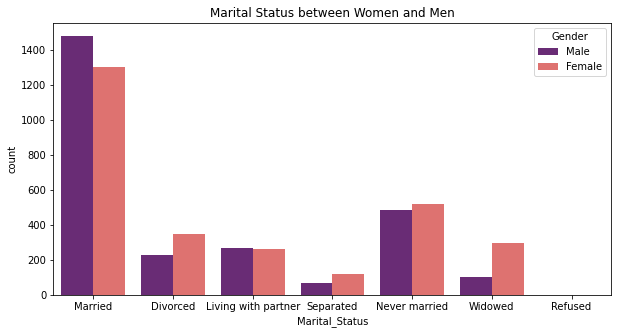

In [69]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Marital_Status', hue = 'Gender', data = new_df, palette = 'magma')
plt.title('Marital Status between Women and Men')
plt.show()

As we can conclude from the analysis all Marital Status categories have almost the same distribution for male and female. We can see significant difference in "Widowed" category. Where female respondents appeared to have higher frequency than male. We also see that women have more frequency in the "Divorced" category. However, frequency in the "Married" category is higher among male than female respondents.

Then construct these three contingency tables using only people whose age is between 30 and 40.

In [28]:
#Combined Frequency Table grouped by Marital Status and Gender for people whose age is between 30 and 40
new_df[(new_df['Age'] >= 30) & (new_df['Age'] <=40)].groupby('Marital_Status')['Gender'].value_counts()

Marital_Status       Gender
Divorced             Female     46
                     Male       24
Living with partner  Male       78
                     Female     65
Married              Female    285
                     Male      275
Never married        Female    116
                     Male      101
Refused              Male        1
Separated            Female     18
                     Male       12
Widowed              Male        3
                     Female      2
Name: Gender, dtype: int64

same thing on separate tables

In [29]:
#for women
new_df[(new_df['Gender'] == 'Female') & (new_df['Age'] >= 30) & (new_df['Age'] <=40)].groupby('Marital_Status')['Gender'].count()

Marital_Status
Divorced                46
Living with partner     65
Married                285
Never married          116
Separated               18
Widowed                  2
Name: Gender, dtype: int64

In [30]:
#for men
new_df[(new_df['Gender'] == 'Male') & (new_df['Age'] >= 30) & (new_df['Age'] <=40)].groupby('Marital_Status')['Gender'].count()

Marital_Status
Divorced                24
Living with partner     78
Married                275
Never married          101
Refused                  1
Separated               12
Widowed                  3
Name: Gender, dtype: int64

In [31]:
#for all people
new_df[(new_df['Age'] >= 30) & (new_df['Age'] <=40)].groupby('Marital_Status')['Gender'].count()

Marital_Status
Divorced                70
Living with partner    143
Married                560
Never married          217
Refused                  1
Separated               30
Widowed                  5
Name: Gender, dtype: int64

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

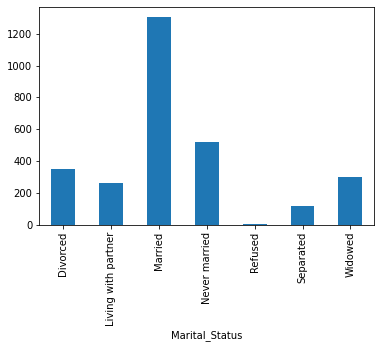

In [32]:
new_df[new_df['Gender'] == 'Female'].groupby('Marital_Status')['Gender'].count().plot(kind='bar')

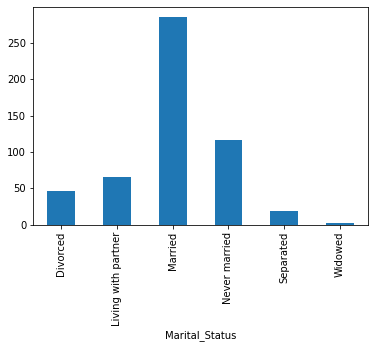

In [33]:
new_df[(new_df['Gender'] == 'Female') & (new_df['Age'] >= 30) & (new_df['Age'] <=40)].groupby('Marital_Status')['Gender'].count().plot(kind='bar')

In the 30-40 age group significant differences were in the "Widowed" and "Divorced" categories. To compare with women in all ages women between 30 -40 have less frequency in "Widowed" and "Divorced" categories.

__Q1c.__ Repeat part b for the men.

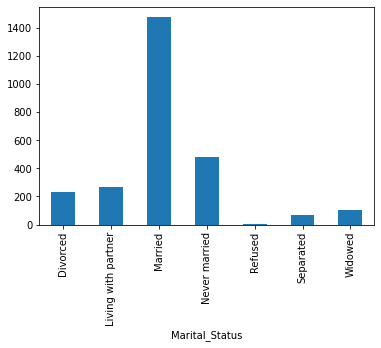

In [34]:
new_df[new_df['Gender'] == 'Male'].groupby('Marital_Status')['Gender'].count().plot(kind='bar')

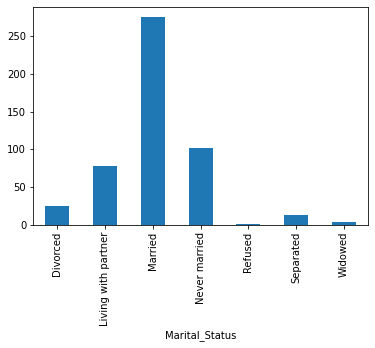

In [35]:
new_df[(new_df['Gender'] == 'Male') & (new_df['Age'] >= 30) & (new_df['Age'] <=40)].groupby('Marital_Status')['Gender'].count().plot(kind='bar')

Here we can notice significant differences in the "Living with partner" and "Widowed" categories. In the 30-40 age group frequencies for these categories are less to compare with all age groups.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [36]:
new_df["Age"].describe()

count    5474.000000
mean       49.461820
std        17.669968
min        20.000000
25%        34.000000
50%        49.000000
75%        64.000000
max        80.000000
Name: Age, dtype: float64

In [39]:
new_df["Age_Group"] = pd.cut(new_df.Age, [20,30,40,50,60,70,80])

In [40]:
new_df.head()

,DMDMARTL,RIAGENDR,RIDAGEYR,Marital_Status,Gender,Age,Age_Group
0,1.0,1,62,Married,Male,62,"(60, 70]"
1,3.0,1,53,Divorced,Male,53,"(50, 60]"
2,1.0,1,78,Married,Male,78,"(70, 80]"
3,6.0,2,56,Living with partner,Female,56,"(50, 60]"
4,3.0,2,42,Divorced,Female,42,"(40, 50]"


In [41]:
new_df_female = new_df[(new_df['Gender'] == "Female" )]
new_df_female.reset_index(inplace = True, drop = True)

In [42]:
Freq_Table = pd.crosstab(new_df_female.Marital_Status, new_df_female.Age_Group)

In [44]:
Freq_Table.apply(lambda z: 100*z/z.sum(), axis = 1)

Age_Group,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
Marital_Status,,,,,,
Divorced,3.142857,12.285714,19.714286,23.714286,24.285714,16.857143
Living with partner,41.732283,22.440945,14.566929,12.598425,7.480315,1.181102
Married,12.058372,19.815668,22.119816,19.738863,16.282642,9.984639
Never married,46.734694,19.795918,12.857143,8.571429,7.755102,4.285714
Refused,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000
Separated,9.322034,14.406780,27.966102,22.881356,18.644068,6.779661
Widowed,0.000000,0.675676,4.054054,9.459459,21.959459,63.851351


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

As we see, the proportion of "Living with partner" and "Never married" is high in young ages. As age grows the percentage of these variables decreases.

__Q2b.__ Repeat the construction for males.

In [60]:
new_df_male = new_df[(new_df['Gender'] == "Male" )]
new_df_male.reset_index(inplace = True, drop = True)

In [61]:
Freq_Table_male = pd.crosstab(new_df_male.Marital_Status, new_df_male.Age_Group)

In [62]:
Freq_Table_male.apply(lambda z: 100*z/z.sum(), axis = 1)

Age_Group,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
Marital_Status,,,,,,
Divorced,0.873362,10.480349,14.847162,24.890830,24.017467,24.890830
Living with partner,35.114504,27.480916,12.595420,12.977099,8.396947,3.435115
Married,6.978320,17.479675,19.105691,20.054201,19.715447,16.666667
Never married,50.446429,19.866071,8.705357,10.491071,8.482143,2.008929
Refused,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
Separated,10.294118,17.647059,16.176471,14.705882,20.588235,20.588235
Widowed,2.000000,2.000000,2.000000,10.000000,17.000000,67.000000


__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

Tendency in "Living with partner" and "Never married" is the same as in Female age groups. However, the proportion is higher among Male respondents. As the age group grows "Living with partner" and "Never married" % decreases.

## Question 3

Construct a histogram of the distribution of heights in the NHANES sample.

In [63]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


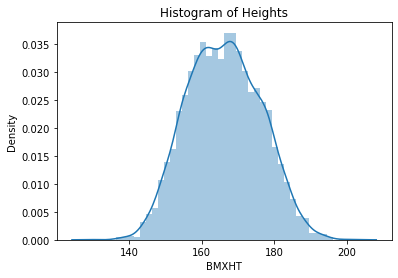

In [64]:
sns.distplot(df["BMXHT"]).set_title("Histogram of Heights")
plt.show()

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


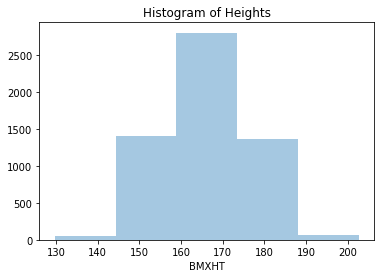

In [65]:
sns.distplot(df["BMXHT"], bins=5, kde = False).set_title("Histogram of Heights")
plt.show()

Bins specifies the size of the groups into which the data is sorted. When we have a high number in bins our histogram is more bell shaped which is the case in default parameter.

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

In [66]:
male_heights = df.loc[(df.RIAGENDR  == 1), "BMXHT"]

In [67]:
female_heights = df.loc[(df.RIAGENDR  == 2), "BMXHT"]

In [68]:
male_heights.head()

0    184.5
1    171.4
2    170.1
6    165.4
8    166.1
Name: BMXHT, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


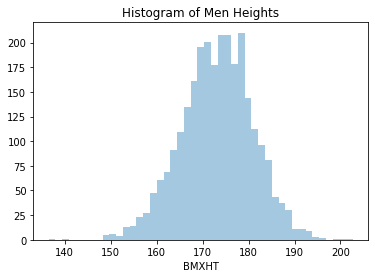

In [70]:
sns.distplot(male_heights, kde = False).set_title("Histogram of Men Heights")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


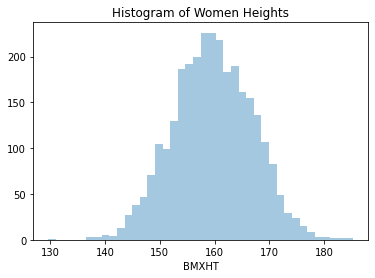

In [71]:
sns.distplot(female_heights, kde = False).set_title("Histogram of Women Heights")
plt.show()

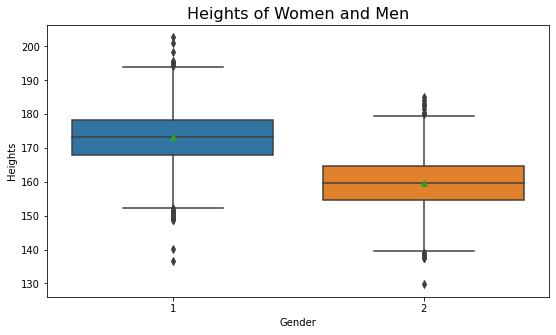

In [72]:
plt.figure(figsize=(9,5))
sns.boxplot(x="RIAGENDR", y="BMXHT", data=df, showmeans=True)
plt.xlabel("Gender")
plt.ylabel("Heights")
plt.title("Heights of Women and Men",fontdict={"fontsize":16})
plt.show()

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

In boxplot we can easily see where most of the variance of data is concentrated. The variance of data in Male(1) respondents is concentrated in about 170-180 interval. However, for Female(2) it is about 155-165. In the histogram we see more central tendency than variability of data.

__Q3d.__ Make a histogram of the log-transformed heights.

In [73]:
#transforming to log value
log_heights = np.log(df['BMXHT'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


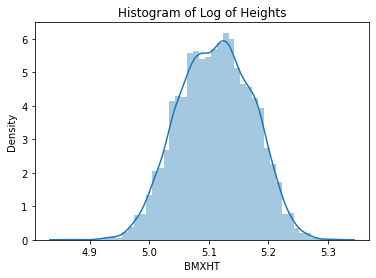

In [74]:
sns.distplot(log_heights).set_title("Histogram of Log of Heights")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


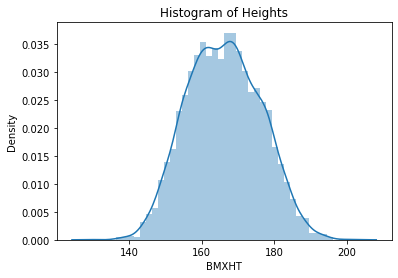

In [75]:
sns.distplot(df["BMXHT"]).set_title("Histogram of Heights")
plt.show()

__Q3e.__ Comment on the relationship between the ditribution of the heights and the distribution of the log-transformed heights. 

They almost look the same in our case, but Log Histogram is more bell shaped, we do it to transform our data, especially outliers to have a Normal Distribution.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

In [76]:
difference = df['BPXSY2'] - df['BPXSY1']

In [77]:
difference.head()

0    -4.0
1    -6.0
2    -6.0
3     2.0
4    14.0
dtype: float64

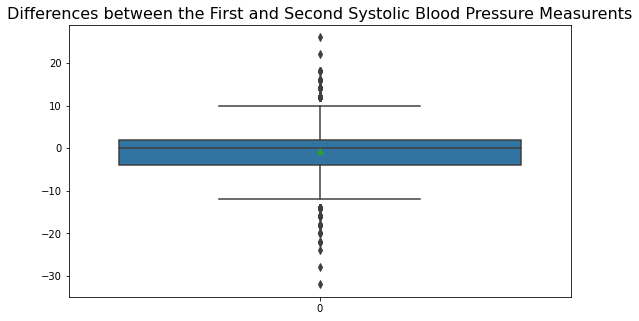

In [78]:
plt.figure(figsize=(9,5))
sns.boxplot(data=difference, showmeans=True)
plt.title("Differences between the First and Second Systolic Blood Pressure Measurents",fontdict={"fontsize":16})
plt.show()

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

!!!!! I have some difficulty to interpret this result. I think I didn't get the above question right.

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

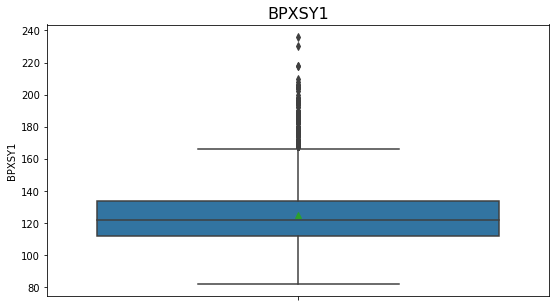

In [79]:
plt.figure(figsize=(9,5))
sns.boxplot(y="BPXSY1", data=df, showmeans=True)
plt.title("BPXSY1",fontdict={"fontsize":16})
plt.show()

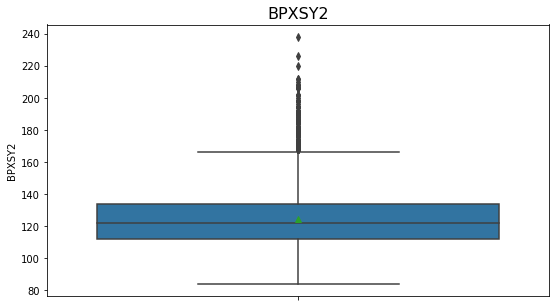

In [80]:
plt.figure(figsize=(9,5))
sns.boxplot(y="BPXSY2", data=df, showmeans=True)
plt.title("BPXSY2",fontdict={"fontsize":16})
plt.show()

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [81]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [82]:
edu_df = df.loc[:, ["RIAGENDR", "RIDAGEYR", "DMDEDUC2", "DMDHHSIZ"]]

In [83]:
pd.isnull(edu_df).sum()

RIAGENDR      0
RIDAGEYR      0
DMDEDUC2    261
DMDHHSIZ      0
dtype: int64

In [84]:
#drop missing values
edu_df = edu_df.dropna()

In [85]:
#reset index
edu_df.reset_index(inplace=True, drop=True)

In [86]:
#rechecking the shape
edu_df.shape

(5474, 4)

In [87]:
edu_df['Gender'] = edu_df['RIAGENDR'].replace({1: "Male", 2: "Female"})

In [88]:
edu_df['DMDEDUC2'].unique()

array([5., 3., 4., 2., 1., 9.])

In [89]:
edu_df['Edu'] = edu_df['DMDEDUC2'].replace({5: "College graduate or above", 3: "High school graduate/GED",
                                            4: "Some college or AA degree", 2: "9-11th grade",
                                            1: "Less than 9th grade", 9: "Don't Know"})

In [90]:
edu_df.head()

,RIAGENDR,RIDAGEYR,DMDEDUC2,DMDHHSIZ,Gender,Edu
0,1,62,5.0,2,Male,College graduate or above
1,1,53,3.0,1,Male,High school graduate/GED
2,1,78,3.0,2,Male,High school graduate/GED
3,2,56,5.0,1,Female,College graduate or above
4,2,42,4.0,5,Female,Some college or AA degree


In [91]:
edu_df['DMDHHSIZ'].unique()

array([2, 1, 5, 3, 4, 7, 6])

In [95]:
#frequency table of household sizes for people within each educational attainment category
freq_edu = edu_df.groupby(["DMDHHSIZ", "Edu"]).agg({'Edu': 'count'})

In [96]:
freq_edu

Edu
DMDHHSIZ Edu                           
1        9-11th grade                75
         College graduate or above  195
         High school graduate/GED   181
         Less than 9th grade         72
         Some college or AA degree  245
2        9-11th grade               143
         College graduate or above  475
         Don't Know                   2
         High school graduate/GED   321
         Less than 9th grade        147
         Some college or AA degree  436
3        9-11th grade               105
         College graduate or above  265
         High school graduate/GED   203
         Less than 9th grade         96
         Some college or AA degree  313
4        9-11th grade                98
         College graduate or above  226
         High school graduate/GED   192
         Less than 9th grade         87
         Some college or AA degree  274
5        9-11th grade                94
         College graduate or above  130
         Don't Know                   1
         High school graduate/GED   130
         Less than 9th grade         97
         Some college or AA degree  198
6        9-11th grade                73
         College graduate or above   40
         High school graduate/GED    78
         Less than 9th grade         71
         Some college or AA degree   82
7        9-11th grade                55
         College graduate or above   35
         High school graduate/GED    81
         Less than 9th grade         85
         Some college or AA degree   73

Convert the frequencies to proportions.

In [97]:
freq_edu.apply(lambda x:  100*x / x.sum())

Edu
DMDHHSIZ Edu                                
1        9-11th grade               1.370113
         College graduate or above  3.562294
         High school graduate/GED   3.306540
         Less than 9th grade        1.315309
         Some college or AA degree  4.475703
2        9-11th grade               2.612349
         College graduate or above  8.677384
         Don't Know                 0.036536
         High school graduate/GED   5.864085
         Less than 9th grade        2.685422
         Some college or AA degree  7.964925
3        9-11th grade               1.918159
         College graduate or above  4.841067
         High school graduate/GED   3.708440
         Less than 9th grade        1.753745
         Some college or AA degree  5.717939
4        9-11th grade               1.790281
         College graduate or above  4.128608
         High school graduate/GED   3.507490
         Less than 9th grade        1.589331
         Some college or AA degree  5.005480
5        9-11th grade               1.717209
         College graduate or above  2.374863
         Don't Know                 0.018268
         High school graduate/GED   2.374863
         Less than 9th grade        1.772013
         Some college or AA degree  3.617099
6        9-11th grade               1.333577
         College graduate or above  0.730727
         High school graduate/GED   1.424918
         Less than 9th grade        1.297041
         Some college or AA degree  1.497991
7        9-11th grade               1.004750
         College graduate or above  0.639386
         High school graduate/GED   1.479722
         Less than 9th grade        1.552795
         Some college or AA degree  1.333577

__Q5a.__ Comment on any major differences among the distributions.

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [98]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [99]:
mvu_df = df.loc[:, ["SDMVPSU", "RIDAGEYR", "BMXHT", "BMXBMI", "RIAGENDR"]]

In [100]:
#mean
mvu_df.groupby(["RIAGENDR", "SDMVPSU"]).agg({'BMXBMI': [np.mean], 'RIDAGEYR': [np.mean], 'BMXHT': [np.mean] })

BMXBMI   RIDAGEYR       BMXHT
                       mean       mean        mean
RIAGENDR SDMVPSU                                  
1        1        29.162812  48.604635  172.820114
         2        28.368793  48.041199  173.464545
2        1        30.471591  47.940516  159.351770
         2        29.390677  47.640465  160.005245

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

We have almost the same mean among the MVUs. Slightly difference are in "BMXHT" variable.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [101]:
from scipy import stats

In [102]:
#Interquartlie range for 1st MVU and Male
iqr_1_m = mvu_df[(mvu_df['SDMVPSU'] == 1 ) & (mvu_df['RIAGENDR'] == 1 )]

In [103]:
iqr_1_m.reset_index(inplace=True, drop=True)

In [104]:
#Age
stats.iqr(iqr_1_m['RIDAGEYR'])

32.0

In [105]:
#BMI
stats.iqr(iqr_1_m['BMXBMI'])

nan

In [106]:
#Heights
stats.iqr(iqr_1_m['BMXHT'])

nan

In [107]:
#Interquartlie range for 1st MVU and Female
iqr_1_fm = mvu_df[(mvu_df['SDMVPSU'] == 1 ) & (mvu_df['RIAGENDR'] == 2 )]

In [108]:
#Age
stats.iqr(iqr_1_fm['RIDAGEYR'])

30.0

In [109]:
#BMI
stats.iqr(iqr_1_fm['BMXBMI'])

nan

In [110]:
#Heights
stats.iqr(iqr_1_fm['BMXHT'])

nan

In [111]:
#Interquartlie range for 2nd MVU and Male
iqr_2_m = mvu_df[(mvu_df['SDMVPSU'] == 2 ) & (mvu_df['RIAGENDR'] == 1 )]

In [112]:
#Age
stats.iqr(iqr_2_m['RIDAGEYR'])

31.0

In [113]:
#BMI
stats.iqr(iqr_2_m['BMXBMI'])

nan

In [114]:
#Heights
stats.iqr(iqr_2_m['BMXHT'])

nan

In [115]:
#Interquartlie range for 2nd MVU and Male
iqr_2_fm = mvu_df[(mvu_df['SDMVPSU'] == 2 ) & (mvu_df['RIAGENDR'] == 2 )]

In [116]:
#Age
stats.iqr(iqr_2_fm['RIDAGEYR'])

32.0

In [117]:
#BMI
stats.iqr(iqr_2_fm['BMXBMI'])

nan

In [118]:
#Heights
stats.iqr(iqr_2_fm['BMXHT'])

nan

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.

IQR is a measure of variability. IQR of 0 means there is no variability in the middle 50% of your data. Among three variables we detect variability in the "Age" variable.